# Heart Disease Classification

## Introduction

Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the *absence* of treatment, people are going to want to know **why**.

The following models will be explored:
1. Logistic regression - Manual and sklearn
2. KNN
3. SVM
4. Naïve Bayes
5. Decision Tree
6. Random Forests 

### Packages

1. `numpy`: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
2. `pandas`: it offers data structures and operations for manipulating numerical tables and time series
3. `matplotlib`: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
4. `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. `sklearn`: Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language
6. `scipy`: SciPy is a free and open-source Python library used for scientific computing and technical computing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Reading Data

In [3]:
df = pd.read_csv("data/heart.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


<IPython.core.display.Javascript object>

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Target Variables

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<IPython.core.display.Javascript object>

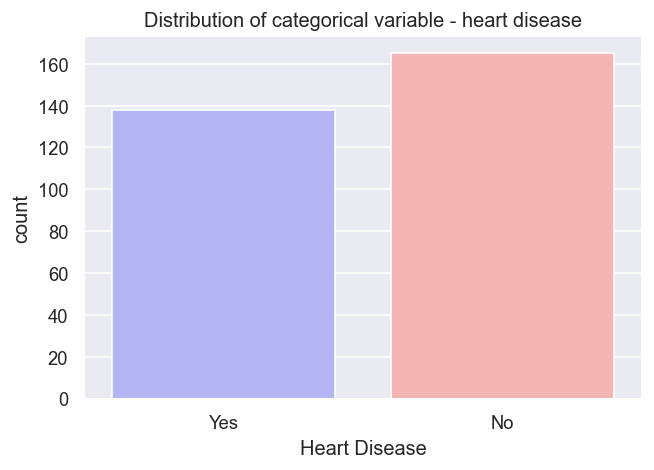

<IPython.core.display.Javascript object>

In [6]:
sns.set(rc={"figure.figsize": (6, 4), "figure.dpi": 120})
target_countplot = sns.countplot(x="target", data=df, palette="bwr")
target_countplot.set(xticklabels=["Yes", "No"])
plt.title("Distribution of categorical variable - heart disease")
plt.xlabel("Heart Disease")
plt.show()

In [7]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print(
    "Percentage of Patients Haven't Heart Disease: {:.2f}%".format(
        (countNoDisease / (len(df.target)) * 100)
    )
)
print(
    "Percentage of Patients Have Heart Disease: {:.2f}%".format(
        (countHaveDisease / (len(df.target)) * 100)
    )
)

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


<IPython.core.display.Javascript object>

### Count of Sex

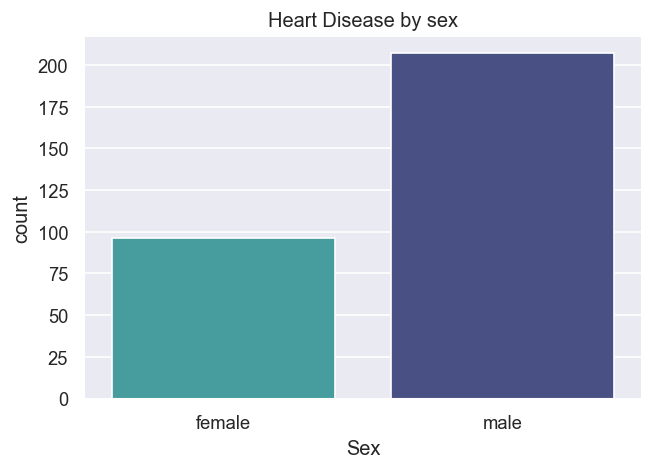

<IPython.core.display.Javascript object>

In [8]:
sns.set(rc={"figure.figsize": (6, 4), "figure.dpi": 120})
sex_countplot = sns.countplot(x="sex", data=df, palette="mako_r")
sex_countplot.set(xticklabels=["female", "male"])
plt.xlabel("Sex")
plt.title("Heart Disease by sex")
plt.show()

In [9]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print(
    "Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex)) * 100))
)
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex)) * 100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


<IPython.core.display.Javascript object>

### Heart Disease by Age

/Users/jacobjohn/Code/Kaggle-Notes/env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


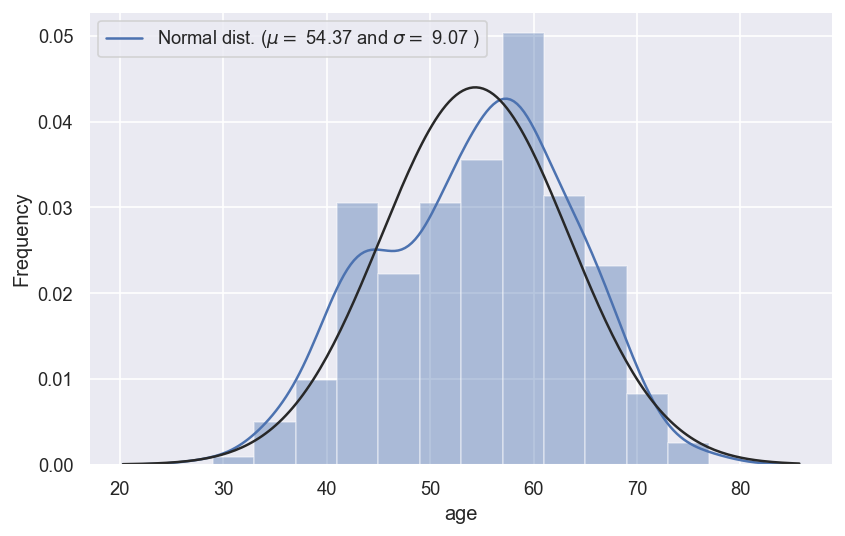

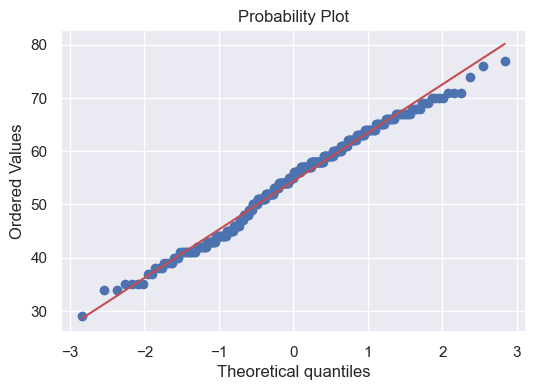

<IPython.core.display.Javascript object>

In [10]:
plt.subplots(figsize=(8, 5))
sns.set({"figure.dpi": 100})
sns.distplot(df.age, fit=stats.norm)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(data=df.age)

# plot with the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.grid(True)

# Probablity plot
fig = plt.figure(dpi=100)
stats.probplot(df.age, plot=plt)
plt.grid(True)
plt.show()

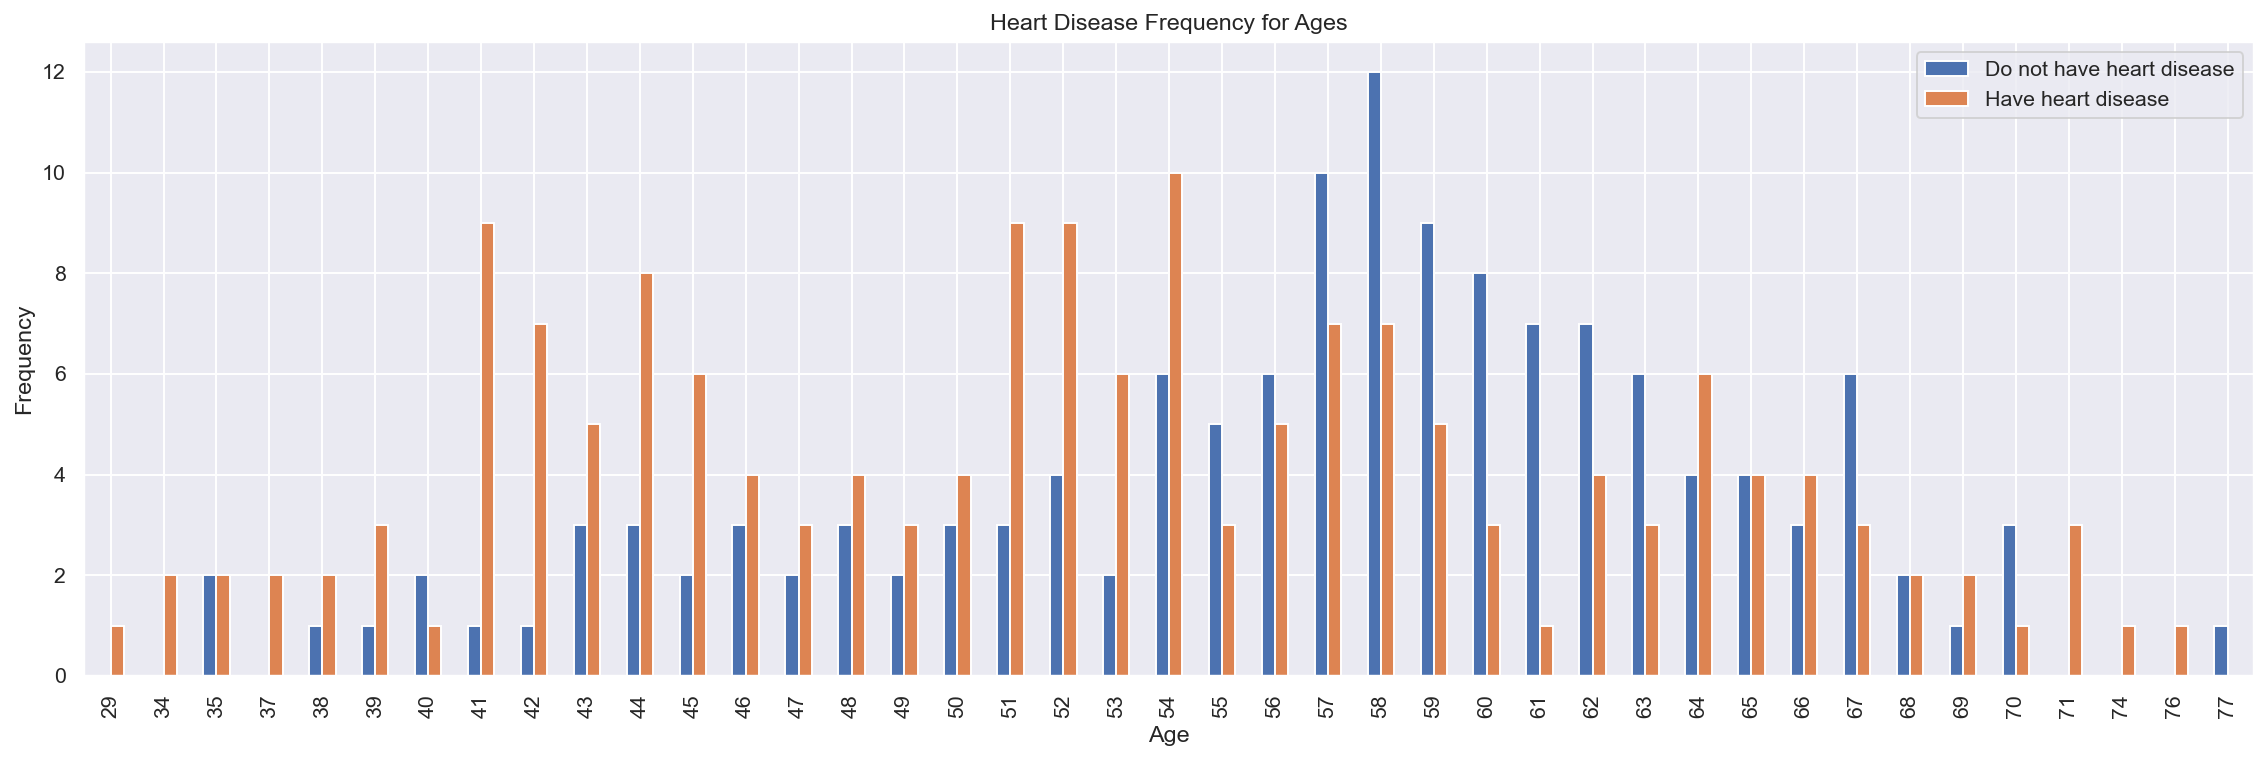

<IPython.core.display.Javascript object>

In [11]:
plt.figure(dpi=140)
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease Frequency for Ages")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

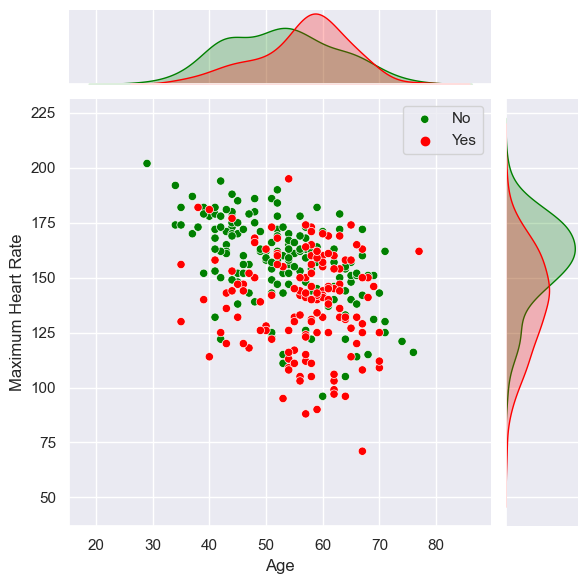

<IPython.core.display.Javascript object>

In [12]:
sns.set(rc={"figure.figsize": (5, 3), "figure.dpi": 100})
g = sns.jointplot(x="age", y="thalach", hue="target", data=df, palette=["red", "green"])
g.ax_joint.legend(labels=["No", "Yes"])
g.ax_joint.set_xlabel("Age")
g.ax_joint.set_ylabel("Maximum Heart Rate")
plt.show()

### Heart Disease by Sex

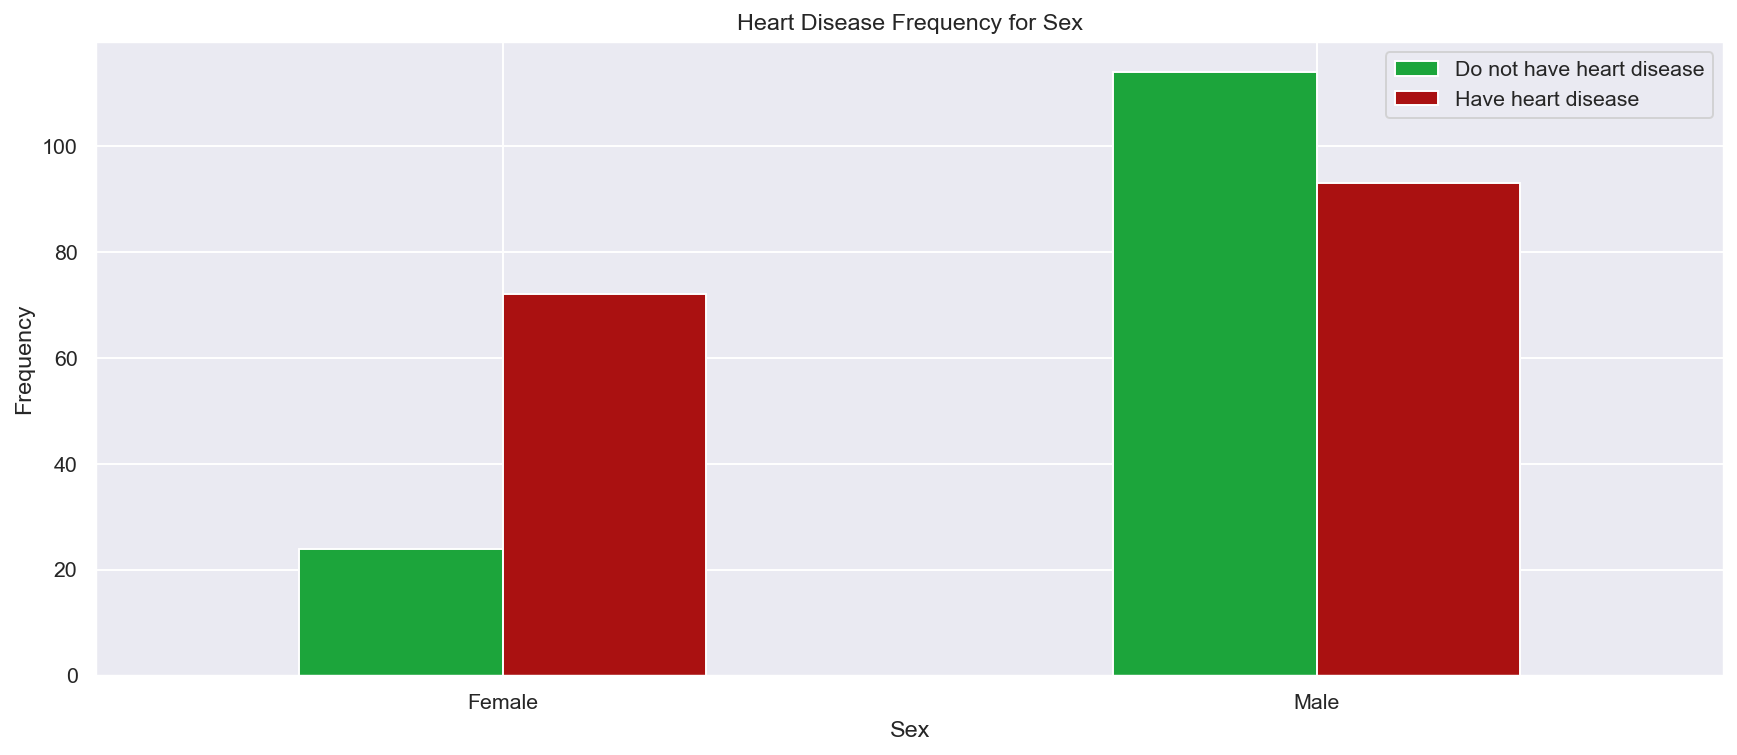

<IPython.core.display.Javascript object>

In [13]:
plt.figure(dpi=140)
pd.crosstab(df.sex, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#1CA53B", "#AA1111"], ax=plt.gca()
)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Female", "Male"])
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.ylabel("Frequency")
plt.show()

### Heart Disease by Slope

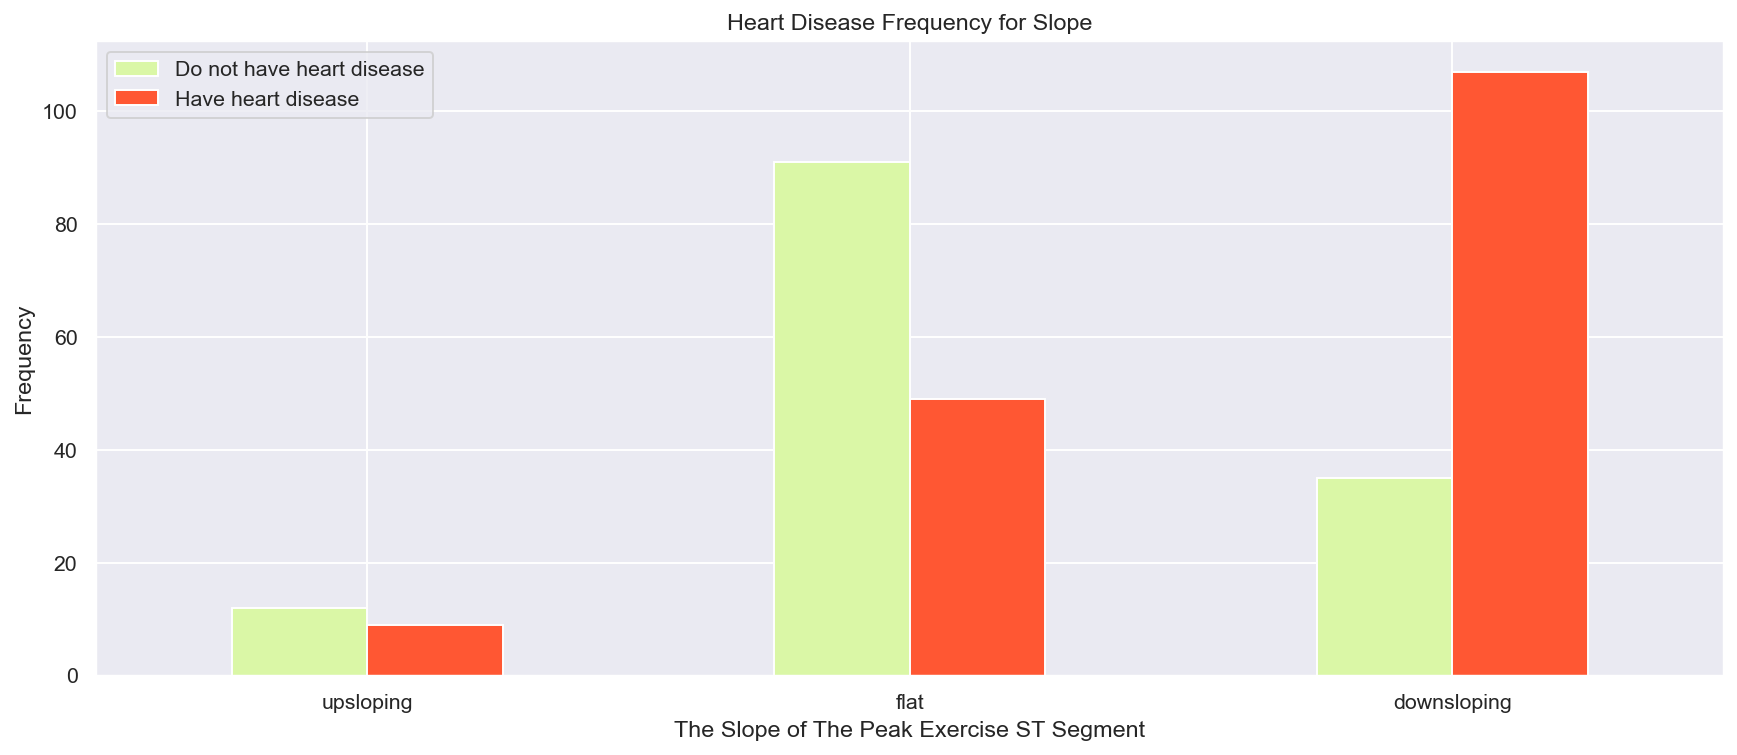

<IPython.core.display.Javascript object>

In [14]:
plt.figure(dpi=140)
pd.crosstab(df.slope, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#DAF7A6", "#FF5733"], ax=plt.gca()
)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of The Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["upsloping", "flat", "downsloping"])
plt.ylabel("Frequency")
plt.show()

### Heart Disease by FBS

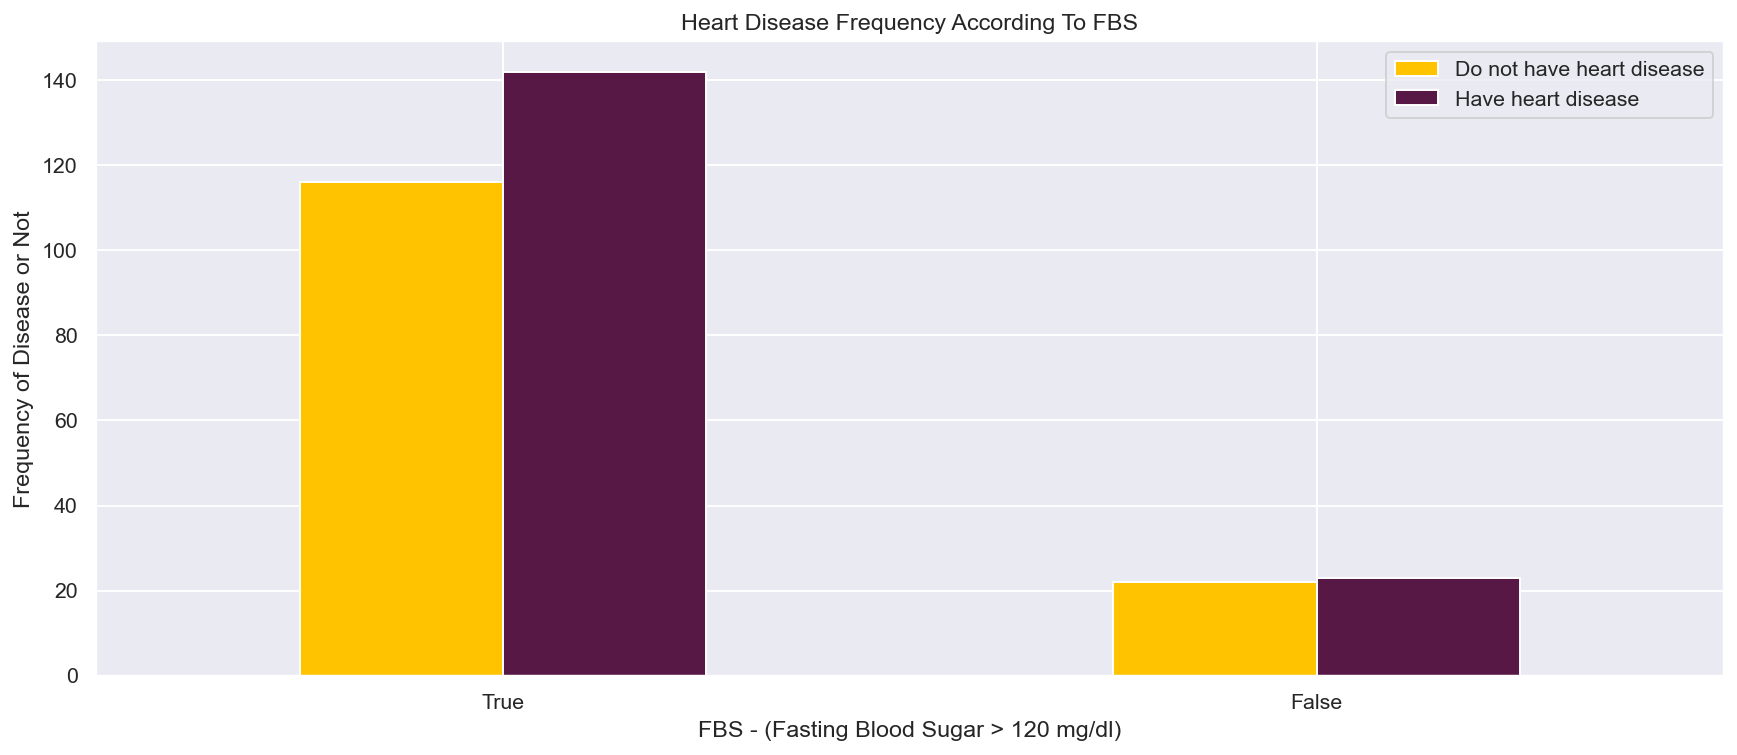

<IPython.core.display.Javascript object>

In [15]:
plt.figure(dpi=140)
pd.crosstab(df.fbs, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#FFC300", "#581845"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To FBS")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)")
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Heart Disease by Chest Pain Experience

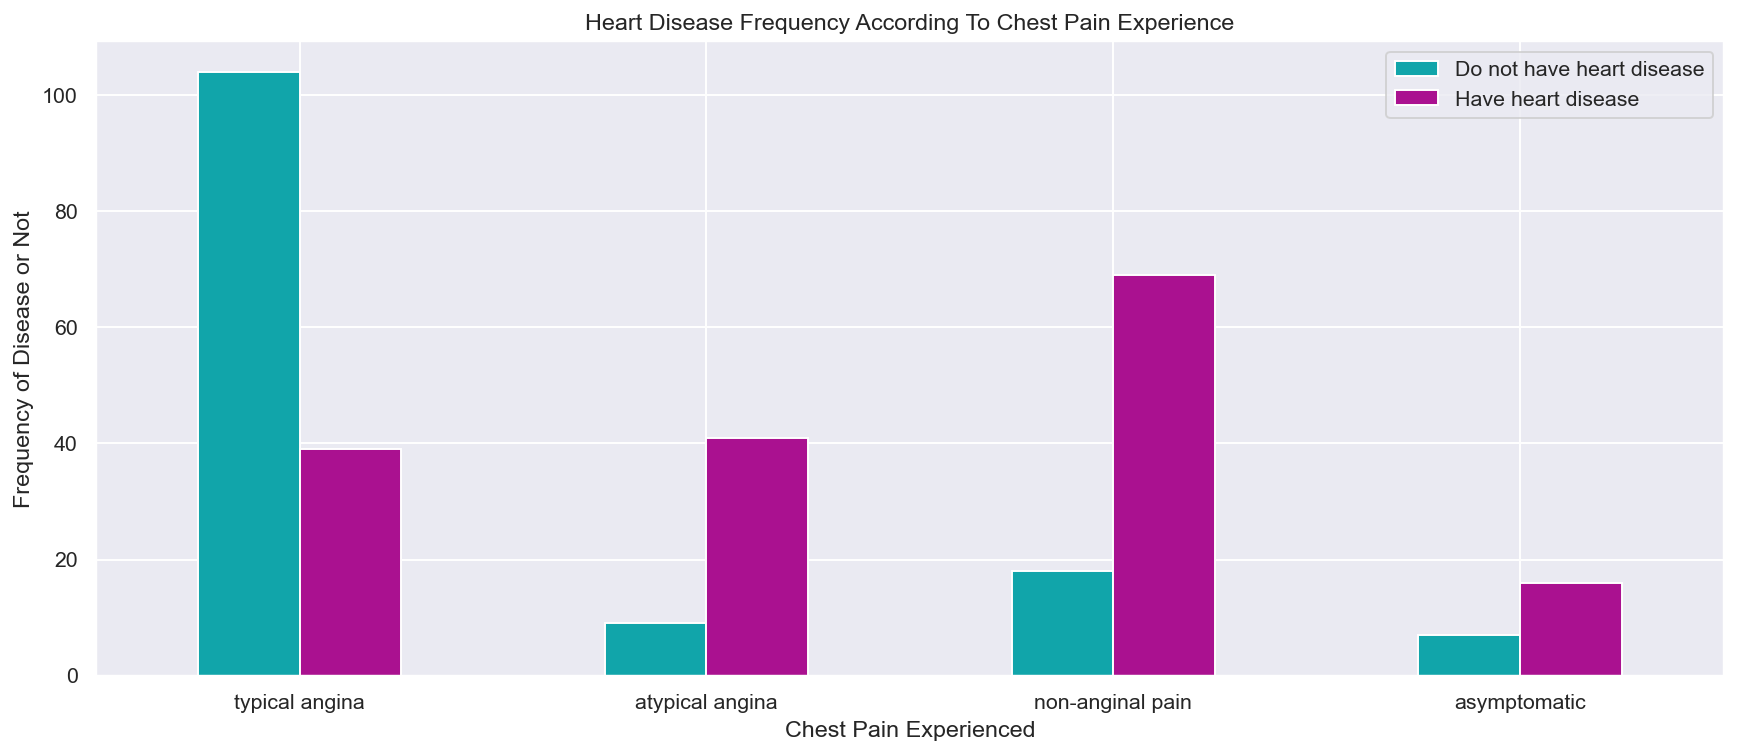

<IPython.core.display.Javascript object>

In [16]:
plt.figure(dpi=140)
pd.crosstab(df.cp, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#11A5AA", "#AA1190"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To Chest Pain Experience")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced")
plt.gca().set_xticklabels(
    labels=["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Creating Dummy Variables using One Hot Encoding

* Since `cp`, `tha` and `slope` are categorical variables we'll turn them into dummy variables.
* Categorical data are variables that contain label values rather than numeric values.
* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
* This means that categorical data must be converted to a numerical form. 
* In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [17]:
a = pd.get_dummies(df["cp"], prefix="cp")
b = pd.get_dummies(df["thal"], prefix="thal")
c = pd.get_dummies(df["slope"], prefix="slope")

<IPython.core.display.Javascript object>

In [18]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

In [19]:
df = df.drop(columns=["cp", "thal", "slope"])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

## Logistic Regression (Using Stochastic Gradient Descent)

* Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of the target or dependent variable is dichotomous, which means there would be only two possible classes.
* In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).
* Mathematically, a logistic regression model predicts $P(Y=1)$ as a function of $X$. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [20]:
y = df.target.values
x_data = df.drop(["target"], axis=1)

<IPython.core.display.Javascript object>

### Normalize Data

* Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.
* A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.
* Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
* The formula is as follows:

<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>



In [21]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

<IPython.core.display.Javascript object>

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

In [23]:
# transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

<IPython.core.display.Javascript object>

Let's say weight = 0.01 and bias = 0.0

In [24]:
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

<IPython.core.display.Javascript object>

### Sigmoid Function

* It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits:

<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [25]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

<IPython.core.display.Javascript object>

### Forward  Propagation

* This step is called forward-propagation, because the calculation flow is going in the natural forward direction from the input -> through the logistic regression function -> to the output.

<br>
<img src="https://image.slidesharecdn.com/gradientdescentbackpropandautomaticdifferentiation-160829164205/95/gradient-descent-back-propagation-and-auto-differentiation-advanced-spark-and-tensorflow-meetup-08042016-62-638.jpg?cb=1472489358" width="500px"/>

### Backward Propagation

* It is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. loss) obtained in the previous epoch (i.e. iteration). Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization.

<br>
<img src="https://miro.medium.com/max/1360/1*dvgzK4beVXBGBELDXP9JpA.png" width="500px"/>

In [26]:
def forwardBackward(weight, bias, x_train, y_train):
    # Forward
    y_hat = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_hat) + (1 - y_train) * np.log(1 - y_hat))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train, ((y_hat - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_hat - y_train) / x_train.shape[1]
    gradients = {
        "Derivative Weight": derivative_weight,
        "Derivative Bias": derivative_bias,
    }

    return cost, gradients

<IPython.core.display.Javascript object>

### Cost Function

* Basically it is a performance metric on how well the Logistic Regression Algorithm manages to reach its goal of generating outputs as close as possible to the desired values.
* The formula is as follows:

<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Stochastic Gradient Descent

* Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 
* Stochastic gradient descent takes all of the data at every iteration and makes updates.

<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

In [27]:
def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []

    # for each iteration, update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, x_train, y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight, "bias": bias}

    print("iteration:", iteration)
    print("cost:", cost)

    plt.figure(dpi=120)
    plt.grid(True)
    plt.plot(index, costList)
    plt.title("Cost Function vs Number of Iterations")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

<IPython.core.display.Javascript object>

In [28]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_hat = sigmoid(z)

    y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(y_hat.shape[1]):
        if y_hat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return y_prediction

<IPython.core.display.Javascript object>

In [29]:
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):
    dimension = x_train.shape[0]
    weight, bias = initialize(dimension)

    parameters, gradients = update(
        weight, bias, x_train, y_train, learningRate, iteration
    )

    y_prediction = predict(parameters["weight"], parameters["bias"], x_test)

    print(
        "Logistic Regression (Manual) Test Accuracy: {:.2f}%".format(
            (100 - np.mean(np.abs(y_prediction - y_test)) * 100)
        )
    )

<IPython.core.display.Javascript object>

iteration: 100
cost: 0.3597736123664534


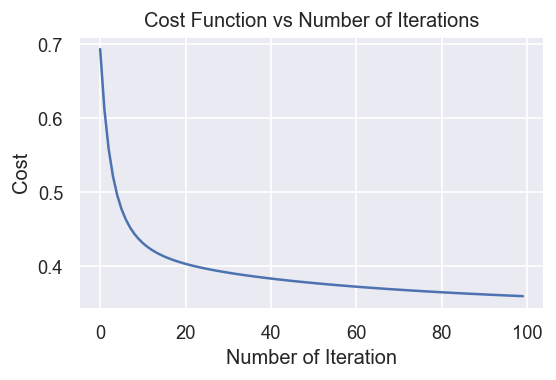

Logistic Regression (Manual) Test Accuracy: 86.89%


<IPython.core.display.Javascript object>

In [30]:
logistic_regression(x_train, y_train, x_test, y_test, 1, 100)

## <font color="blue">Manual Test Accuracy is <font color="red">**86.89%**</font></font><br>

## Sklearn Logistic Regression


In [31]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies["Logistic Regression"] = acc
print("Logistic Regression (using Sklearn) Test Accuracy {:.2f}%".format(acc))

Logistic Regression (using Sklearn) Test Accuracy 86.89%


<IPython.core.display.Javascript object>

## K-Nearest Neighbour (KNN) Classification

* K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problems. 
* KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). * Classification is done by a majority vote to its neighbors. 
* The data is assigned to the class which has the nearest neighbors. 
* As you increase the number of nearest neighbors, the value of k, accuracy might increase.
* K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −
     - **Lazy learning algorithm** − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
     - **Non-parametric learning algorithm** − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.


<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [32]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} - NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))

2 - NN Score: 77.05%


<IPython.core.display.Javascript object>

Now, iterating through 1-20 values of "K" and finding the one with the highest accuracy.

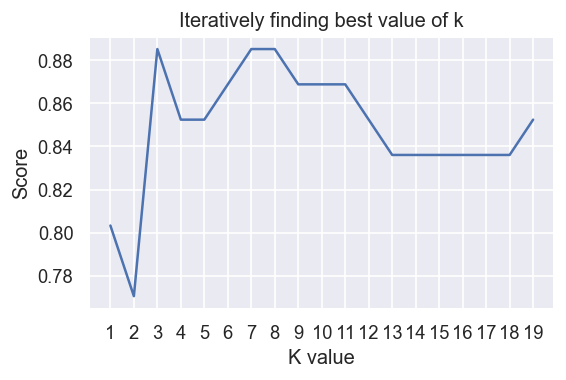

Maximum KNN Score is 88.52%


<IPython.core.display.Javascript object>

In [33]:
# try ro find best k value
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.figure(dpi=120)
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="green">KNN Model's Accuracy is <font color="red">88.52%</font></font>

## Support Vector Machine (SVM) Algorithm 

* Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. 
* But generally, they are used in classification problems. 
* In the 1960s, SVMs were first introduced but later they got refined in 1990. 
* SVMs have their unique way of implementation as compared to other machine learning algorithms. 
* Lately, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [34]:
from sklearn.svm import SVC

<IPython.core.display.Javascript object>

In [35]:
svm = SVC(random_state=1, kernel="rbf")
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T, y_test.T) * 100
accuracies["SVM"] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


<IPython.core.display.Javascript object>

## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 88.52%</font></font>

## Naive Bayes Algorithm

* Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. 
* In simple words, the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class. 
* For example, a phone may be considered as smart if it has a touch screen, internet facility, good camera etc. Though all these features are dependent on each other, they contribute independently to the probability that the phone is a smart phone.
* In Bayesian classification, the main interest is to find the posterior probabilities i.e. the probability of a label given some observed features, $P(L|features)$.


<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accuracies["Naive Bayes"] = acc
print("Accuracy of Naïve Bayes: {:.2f}%".format(acc))

Accuracy of Naïve Bayes: 86.89%


<IPython.core.display.Javascript object>

## <font color="magenta">Accuracy of Naive Bayes: <font color="red">86.89%</font></font>

## Decision Tree Algorithm

* In general, Decision tree analysis is a predictive modelling tool that can be applied across many areas.
* Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. 
* Decisions trees are the most powerful algorithms that fall under the category of supervised algorithms.
* They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we get outcome.

<br>

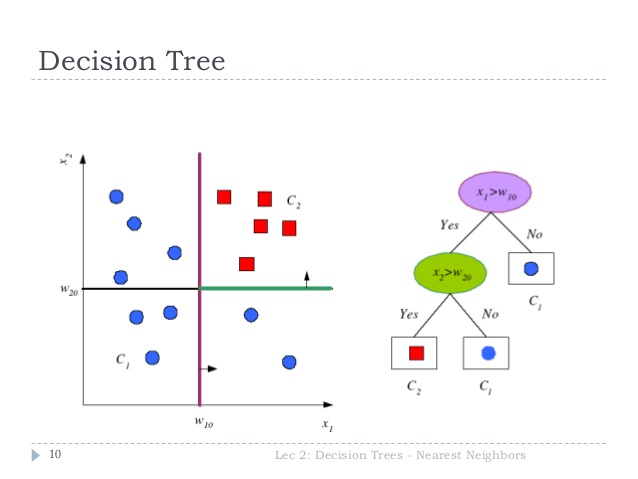

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


<IPython.core.display.Javascript object>

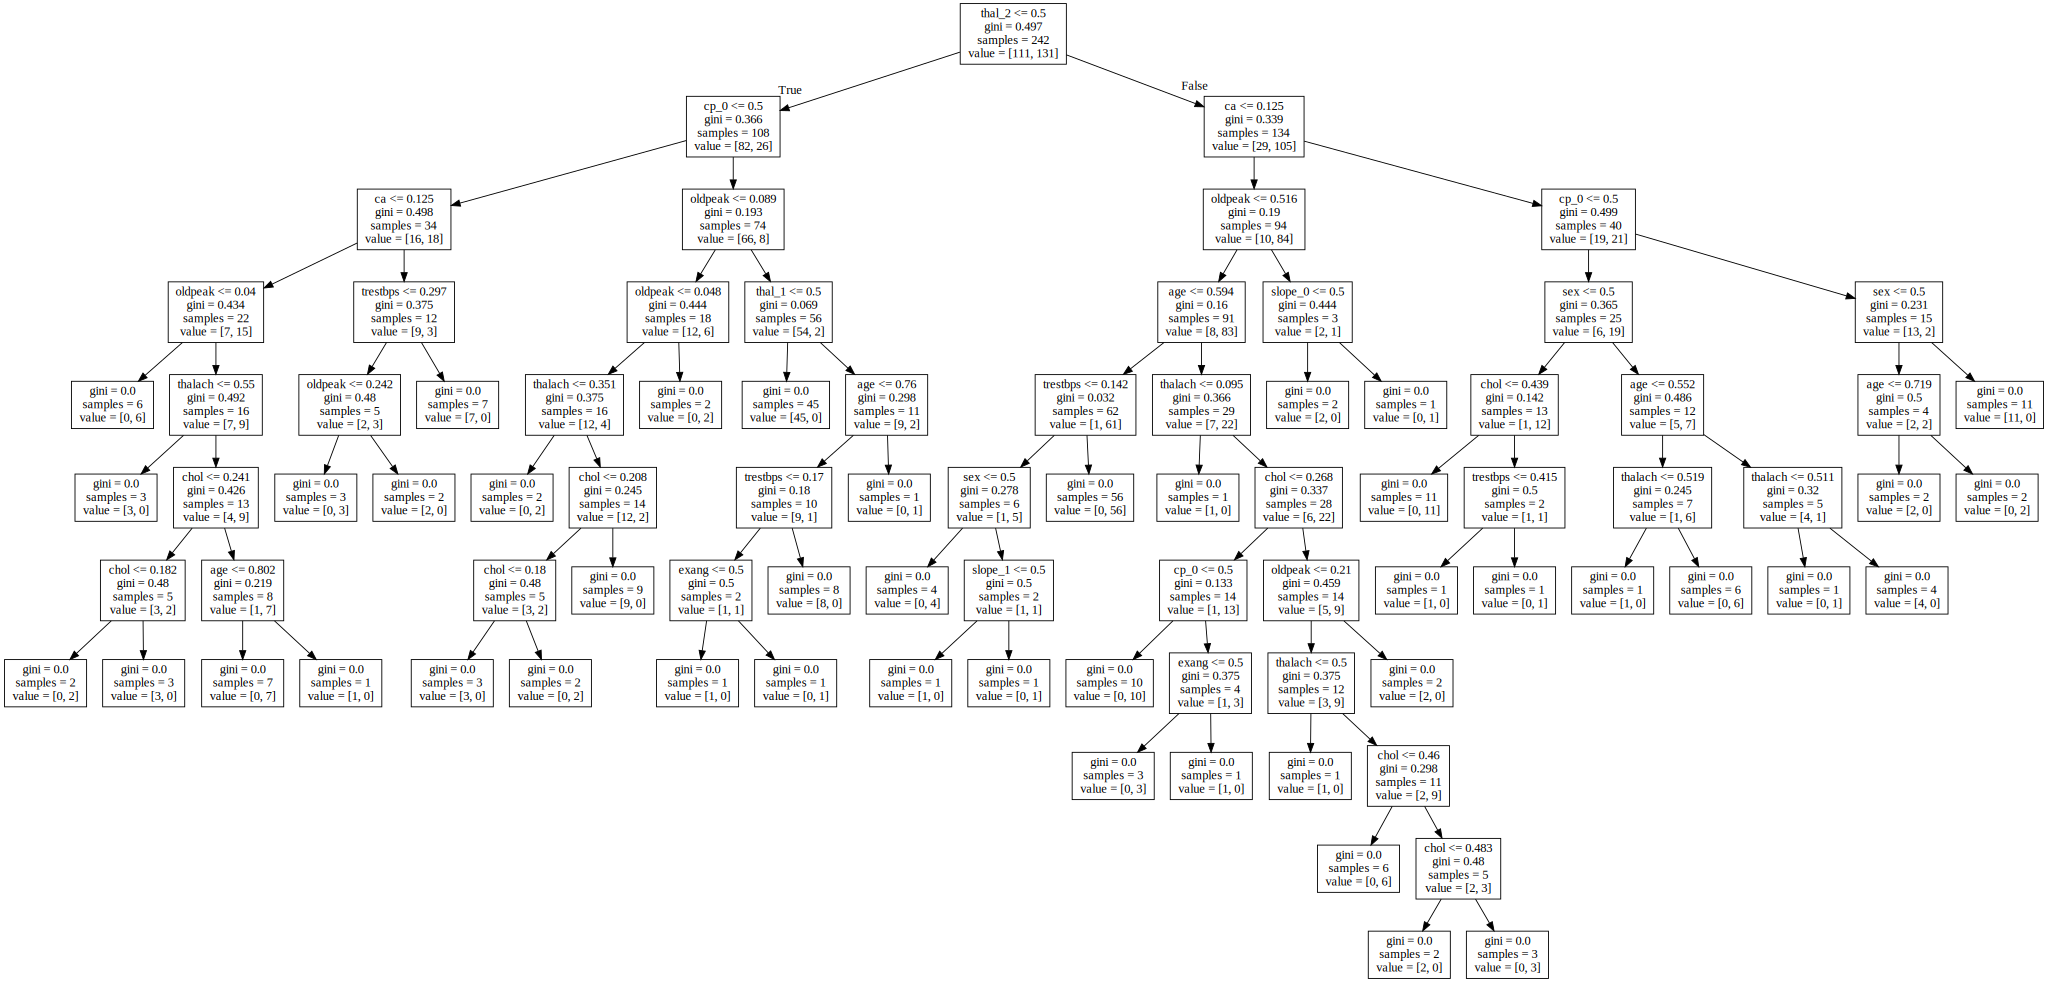

<IPython.core.display.Javascript object>

In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(
    export_graphviz(
        dtc, out_file=None, feature_names=[x for x in df.columns if x != "target"]
    )
)
graph.format = "png"
graph

In [39]:
# saving tree as dtree_render.png
graph.render("dtree_render", view=False)

'dtree_render.png'

<IPython.core.display.Javascript object>

## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">78.69%</font></font>

## Random Forest Classification

* Random forest is a supervised learning algorithm which is used for both classification as well as regression. 
* But however, it is mainly used for classification problems. 
* As we know that a forest is made up of trees and more trees means more robust forest. 
* Similarly, a random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. 
* It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [40]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies["Random Forest"] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


<IPython.core.display.Javascript object>

## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">88.52%</font></font>

## Comparing Models

<Figure size 600x360 with 0 Axes>

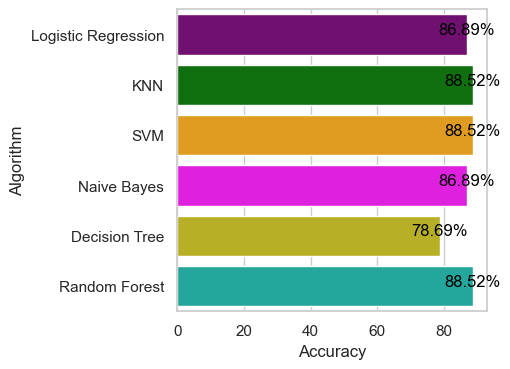

<IPython.core.display.Javascript object>

In [41]:
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(4, 4))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm")
plt.xlabel("Accuracy")
g = sns.barplot(
    y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h"
)
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

## Confusion Matrix

In [42]:
# Predicted values
y_hat_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_hat_knn = knn3.predict(x_test.T)
y_hat_svm = svm.predict(x_test.T)
y_hat_nb = nb.predict(x_test.T)
y_hat_dtc = dtc.predict(x_test.T)
y_hat_rf = rf.predict(x_test.T)

<IPython.core.display.Javascript object>

In [43]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_hat_lr)
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_svm = confusion_matrix(y_test, y_hat_svm)
cm_nb = confusion_matrix(y_test, y_hat_nb)
cm_dtc = confusion_matrix(y_test, y_hat_dtc)
cm_rf = confusion_matrix(y_test, y_hat_rf)

<IPython.core.display.Javascript object>

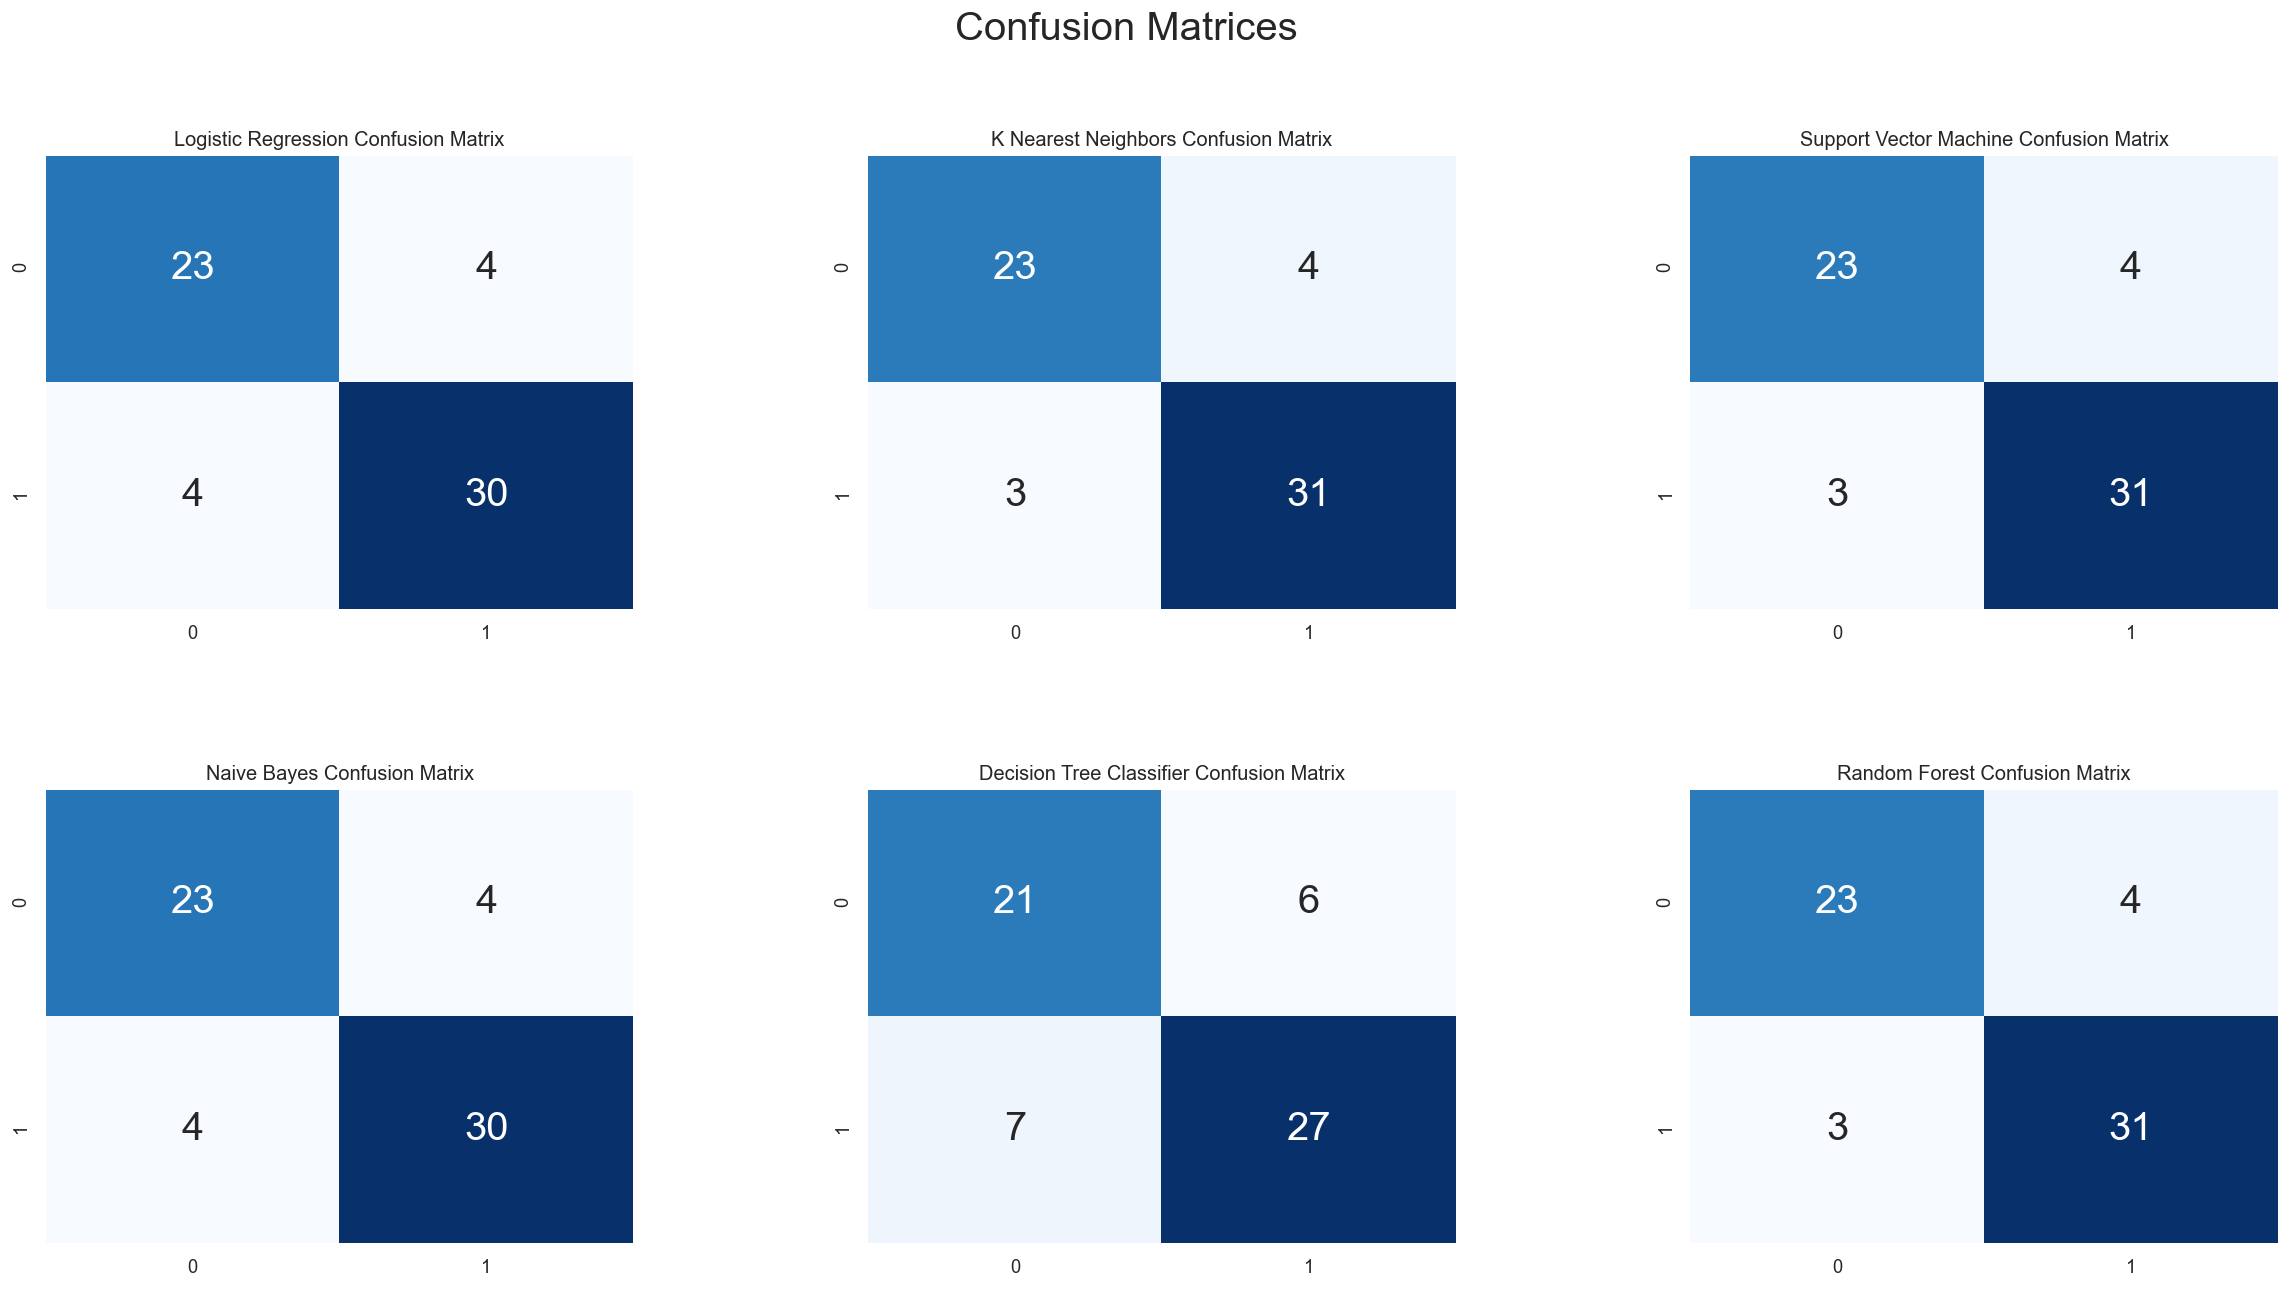

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(24, 12), dpi=120)

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(
    cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()